In [29]:
#fabio.springer.freitas@gmail.com
# Data from https://www.kaggle.com/datasets/khaiid/most-selling-pc-games
import numpy as np
import pandas as pd
import seaborn as sns

When to release a game?

In [30]:
# Import and look at data
games_sales = pd.read_csv(r"C:\Users\fabio\OneDrive\Documentos\testePython\Games_sales\Games.csv")
games_sales.head(15)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts


Name: Name of the game

Sales: Sales of the game in Millions

Series: Series of the game

Release: Release date of the game

Genre: Genre of the game

Developer: Developer of the game

Publisher: Publisher of the game

In [31]:
games_sales.describe()

,Sales
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000


In [32]:
# Wich series sold the most games? 

# Replace NaN with game name if there is no series name
games_sales['Series'] = games_sales['Series'].fillna(games_sales['Name'])

# group by series and sum
games_sales.groupby('Series')['Sales'].sum().sort_values(ascending=False)



Series
PlayerUnknown's Battlegrounds    42.0
Minecraft                        33.0
Diablo                           26.0
The Sims                         24.0
Half-Life                        21.0
                                 ... 
Glory of the Roman Empire         1.0
Full Throttle                     1.0
Frogger                           1.0
Europa Universalis                1.0
Zork                              1.0
Name: Sales, Length: 127, dtype: float64

PlayerUnknown's Battlegrounds sold 42 milion copies and was the most sold video game in the time period. 

In [33]:
#  Who many games are sold in a month?  

# Creat month and day columns 
games_sales[['Month', 'Day']] = games_sales['Release'].str.split('-', expand=True)
games_sales




,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Day
0,PlayerUnknown's Battlegrounds,42.0,PlayerUnknown's Battlegrounds,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,17
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,11
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,12
3,Garry's Mod,20.0,Garry's Mod,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,06
4,Terraria,17.2,Terraria,May-11,Action-adventure,Re-Logic,Re-Logic,May,11
...,...,...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers,Mar,03
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts,Sep,08
172,Who Wants to Be a Millionaire?,1.0,Who Wants to Be a Millionaire?,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios,Nov,99
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts,Dec,94


<AxesSubplot:xlabel='Month', ylabel='Sales'>

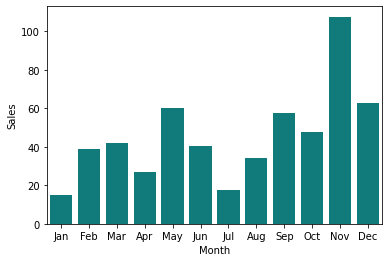

In [38]:
# Creat summary data 
month_games = games_sales.groupby(games_sales['Month'])['Sales'].sum().reset_index()

#plot 
/Months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(data = month_games, x = 'Month', y = 'Sales', order = Months_order , color='darkcyan')

It looks like November is the best month to release a new game. Maybe since it is near Christmas it is easer to sell more. July is the worst month, which is near summer vacation end. 